<a href="https://colab.research.google.com/github/cindyacostap/Ventas-tiendas/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"


In [ ]:
tienda_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [ ]:
#Creamos una nueva columna de factruración
tienda_total["Facturación"] = tienda_total["Precio"]  # Una unidad vendida por fila

In [ ]:
tienda_total.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda,Facturación
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1,164300.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1,192300.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1,209600.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1,757500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1,335200.0


#1. Análisis de facturación



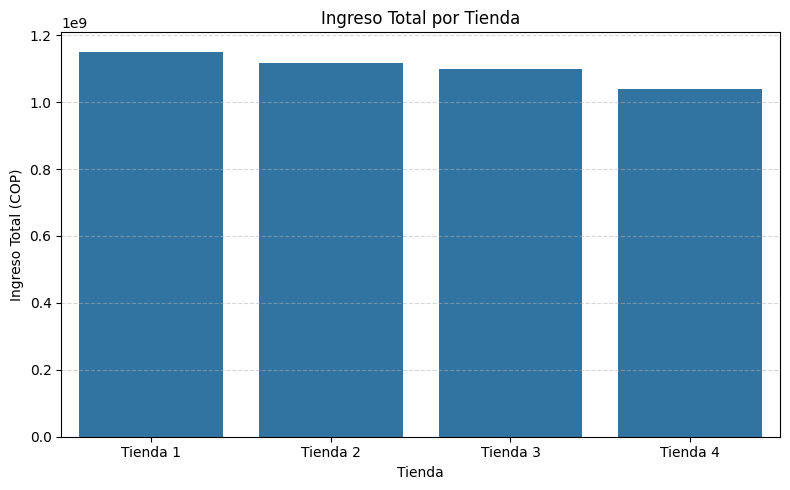

In [ ]:
# Análisis Integral AluraStoreLatam
### Propósito del análisis
# # El Sr. Juan busca identificar cuál de las tiendas de AluraStoreLatam
# presenta mejores indicadores de desempeño para decidir en cuál debe invertir
# o mantener operativa. Este análisis se basa en datos históricos de ventas,
# calificaciones, costos y distribución geográfica.


## 1. Ingreso total por tienda

import matplotlib.pyplot as plt
import seaborn as sns


ingresos_tienda = tienda_total.groupby("Tienda")["Precio"].sum().reset_index().rename(columns={"Precio": "Ingreso Total"})
ingresos_tienda

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=ingresos_tienda, x="Tienda", y="Ingreso Total")
plt.title("Ingreso Total por Tienda")
plt.ylabel("Ingreso Total (COP)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Creamos una función para resumir cada tienda
def resumen_tienda(df, nombre):
    resumen = {
        "Tienda": nombre,
        "Registros": len(df),
        "Facturación Total": df["Precio"].sum(),
        "Precio Promedio": df["Precio"].mean(),
        "Envío Promedio": df["Costo de envío"].mean(),
        "Calificación Promedio": df["Calificación"].mean()
    }
    return resumen

# Aplicamos la función a cada tienda
resumenes = [
    resumen_tienda(tienda, "Tienda 1"),
    resumen_tienda(tienda2, "Tienda 2"),
    resumen_tienda(tienda3, "Tienda 3"),
    resumen_tienda(tienda4, "Tienda 4"),
]

# Convertimos a DataFrame para verlo mejor
df_resumenes = pd.DataFrame(resumenes)

# Mostramos el resumen
df_resumenes


,Tienda,Registros,Facturación Total,Precio Promedio,Envío Promedio,Calificación Promedio
0,Tienda 1,2359,1.150880e+09,487867.910131,26018.609580,3.976685
1,Tienda 2,2359,1.116344e+09,473227.426876,25216.235693,4.037304
2,Tienda 3,2359,1.098020e+09,465459.771089,24805.680373,4.048326
3,Tienda 4,2358,1.038376e+09,440362.892282,23459.457167,3.995759


# 2. Ventas por categoría

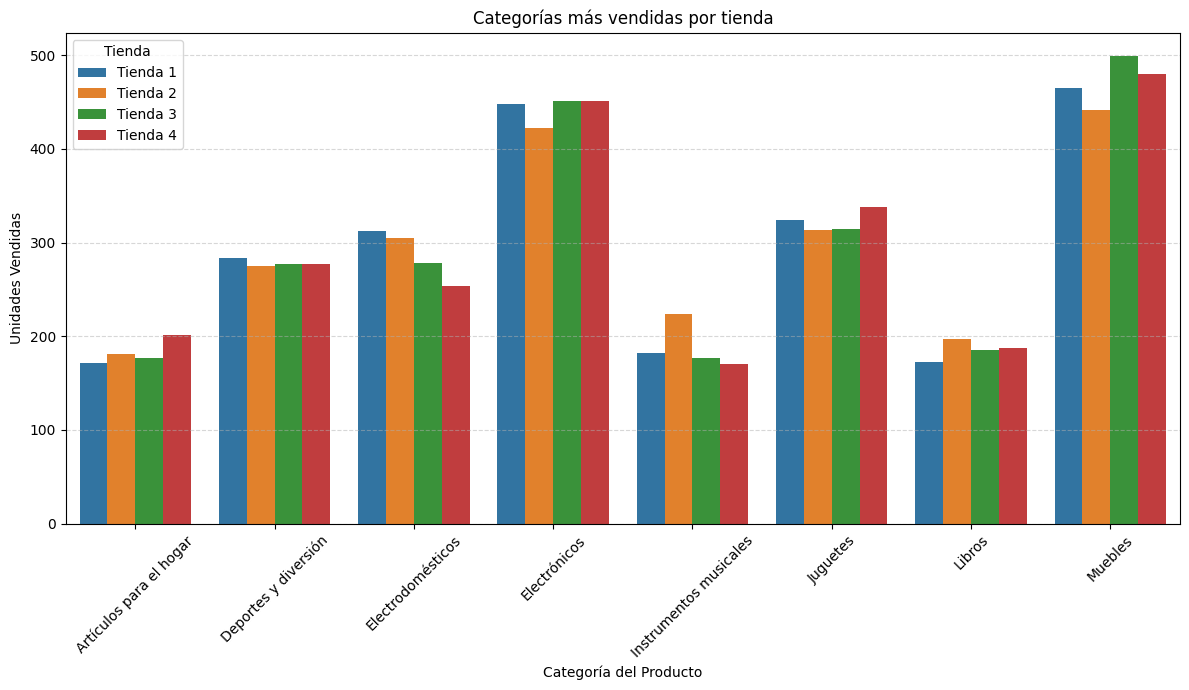

In [ ]:
categorias_por_tienda = tienda_total.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Unidades Vendidas")

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 7))
sns.barplot(data=categorias_por_tienda, x="Categoría del Producto", y="Unidades Vendidas", hue="Tienda")
plt.title("Categorías más vendidas por tienda")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
resumen_categorias = tienda_total.groupby(["Tienda", "Categoría del Producto"])["Facturación"].sum().reset_index()


In [ ]:
resumen_categorias


,Tienda,Categoría del Producto,Facturación
0,Tienda 1,Artículos para el hogar,12698400.0
1,Tienda 1,Deportes y diversión,39290000.0
2,Tienda 1,Electrodomésticos,363685200.0
3,Tienda 1,Electrónicos,429493500.0
4,Tienda 1,Instrumentos musicales,91299000.0
5,Tienda 1,Juguetes,17995700.0
6,Tienda 1,Libros,8784900.0
7,Tienda 1,Muebles,187633700.0
8,Tienda 2,Artículos para el hogar,14746900.0
9,Tienda 2,Deportes y diversión,34744500.0


# 3. Calificación promedio de la tienda


In [ ]:

calificacion_promedio["Calificación"] = calificacion_promedio["Calificación"].round(2)
calificacion_promedio



,Tienda,Calificación
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


# 4. Productos más y menos vendidos

In [ ]:
unidades_por_producto_tienda = tienda_total.groupby(["Tienda", "Producto"]).size().reset_index(name="Unidades Vendidas")



In [ ]:
top_productos_por_tienda = unidades_por_producto_tienda.groupby("Tienda").apply(lambda x: x.sort_values("Unidades Vendidas", ascending=False).head(5)).reset_index(drop=True)
top_productos_por_tienda
bottom_productos_por_tienda = unidades_por_producto_tienda.groupby("Tienda").apply(lambda x: x.sort_values("Unidades Vendidas", ascending=True).head(5)).reset_index(drop=True)
bottom_productos_por_tienda


<ipython-input-34-0d355fe9dfa6>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_productos_por_tienda = unidades_por_producto_tienda.groupby("Tienda").apply(lambda x: x.sort_values("Unidades Vendidas", ascending=False).head(5)).reset_index(drop=True)
<ipython-input-34-0d355fe9dfa6>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_productos_por_tienda = unidades_por_producto_tienda.groupby("Tienda

,Tienda,Producto,Unidades Vendidas
0,Tienda 1,Auriculares con micrófono,33
1,Tienda 1,Celular ABXY,33
2,Tienda 1,Olla de presión,35
3,Tienda 1,Pandereta,36
4,Tienda 1,Ciencia de datos con Python,39
5,Tienda 2,Juego de mesa,32
6,Tienda 2,Impresora,34
7,Tienda 2,Mesa de comedor,34
8,Tienda 2,Sillón,35
9,Tienda 2,Auriculares,37


In [ ]:
# Top 5 productos más vendidos por tienda
top_productos_por_tienda = unidades_por_producto_tienda.groupby("Tienda").apply(
    lambda x: x.sort_values("Unidades Vendidas", ascending=False).head(5)
).reset_index(drop=True)

# Agregamos una columna indicando que es 'Top 5'
top_productos_por_tienda["Ranking"] = "Top 5"

# Bottom 5 productos menos vendidos por tienda
bottom_productos_por_tienda = unidades_por_producto_tienda.groupby("Tienda").apply(
    lambda x: x.sort_values("Unidades Vendidas", ascending=True).head(5)
).reset_index(drop=True)

# Agregamos una columna indicando que es 'Bottom 5'
bottom_productos_por_tienda["Ranking"] = "Bottom 5"

# Combinamos ambas tablas
tabla_resumen = pd.concat([top_productos_por_tienda, bottom_productos_por_tienda], ignore_index=True)

# Mostramos la tabla ordenada por tienda y ranking
tabla_resumen = tabla_resumen.sort_values(["Tienda", "Ranking", "Unidades Vendidas"], ascending=[True, True, False])

tabla_resumen


<ipython-input-35-47b774692705>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_productos_por_tienda = unidades_por_producto_tienda.groupby("Tienda").apply(
<ipython-input-35-47b774692705>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_productos_por_tienda = unidades_por_producto_tienda.groupby("Tienda").apply(


,Tienda,Producto,Unidades Vendidas,Ranking
24,Tienda 1,Ciencia de datos con Python,39,Bottom 5
23,Tienda 1,Pandereta,36,Bottom 5
22,Tienda 1,Olla de presión,35,Bottom 5
20,Tienda 1,Auriculares con micrófono,33,Bottom 5
21,Tienda 1,Celular ABXY,33,Bottom 5
0,Tienda 1,Armario,60,Top 5
1,Tienda 1,TV LED UHD 4K,60,Top 5
2,Tienda 1,Microondas,60,Top 5
3,Tienda 1,Secadora de ropa,58,Top 5
4,Tienda 1,Mesa de noche,56,Top 5


# 5. Envío promedio por tienda

In [ ]:
envio_promedio_tienda = tienda_total.groupby("Tienda")["Costo de envío"].mean().reset_index()
envio_promedio_tienda["Costo de envío"] = envio_promedio_tienda["Costo de envío"].round(2)
envio_promedio_tienda



,Tienda,Costo de envío
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


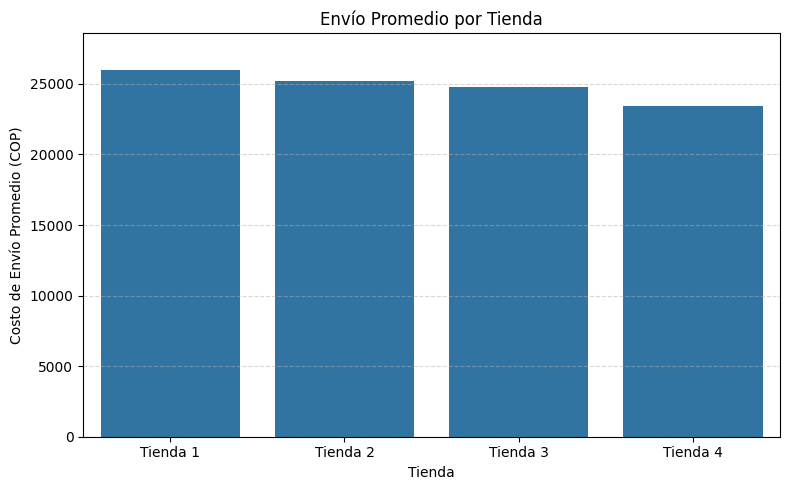

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=envio_promedio_tienda, x="Tienda", y="Costo de envío")
plt.title("Envío Promedio por Tienda")
plt.ylabel("Costo de Envío Promedio (COP)")
plt.ylim(0, envio_promedio_tienda["Costo de envío"].max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
facturacion_total = tienda_total.groupby("Tienda")["Facturación"].sum().reset_index()


In [ ]:
calificacion_promedio = tienda_total.groupby("Tienda")["Calificación"].mean().round(2).reset_index()


In [ ]:
envio_promedio = tienda_total.groupby("Tienda")["Costo de envío"].mean().round(2).reset_index()


In [ ]:
producto_mas_vendido = unidades_por_producto_tienda.groupby("Tienda").apply(lambda x: x.sort_values("Unidades Vendidas", ascending=False).head(1)).reset_index(drop=True)
producto_mas_vendido = producto_mas_vendido[["Tienda", "Producto", "Unidades Vendidas"]]


<ipython-input-43-a34ee6a1786d>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  producto_mas_vendido = unidades_por_producto_tienda.groupby("Tienda").apply(lambda x: x.sort_values("Unidades Vendidas", ascending=False).head(1)).reset_index(drop=True)


In [ ]:
# Unimos paso a paso usando merge
dashboard_resumen = facturacion_total.merge(calificacion_promedio, on="Tienda")
dashboard_resumen = dashboard_resumen.merge(envio_promedio, on="Tienda")
dashboard_resumen = dashboard_resumen.merge(producto_mas_vendido, on="Tienda")

# Renombramos columnas para claridad
dashboard_resumen.columns = [
    "Tienda",
    "Facturación Total",
    "Calificación Promedio",
    "Envío Promedio",
    "Producto Más Vendido",
    "Unidades Vendidas"
]

dashboard_resumen


,Tienda,Facturación Total,Calificación Promedio,Envío Promedio,Producto Más Vendido,Unidades Vendidas
0,Tienda 1,1.150880e+09,3.98,26018.61,Armario,60
1,Tienda 2,1.116344e+09,4.04,25216.24,Iniciando en programación,65
2,Tienda 3,1.098020e+09,4.05,24805.68,Kit de bancas,57
3,Tienda 4,1.038376e+09,4.00,23459.46,Cama box,62


In [ ]:
# Creamos un índice simple (mientras más bajo peor):
dashboard_resumen["Indice Cierre"] = (
    dashboard_resumen["Facturación Total"].rank(ascending=True) +  # menor facturación es peor
    dashboard_resumen["Calificación Promedio"].rank(ascending=True) +  # menor calificación es peor
    dashboard_resumen["Envío Promedio"].rank(ascending=False)  # mayor costo de envío es peor
)

# Ordenamos para ver cuál tienda tendría peor desempeño general
dashboard_resumen.sort_values("Indice Cierre", ascending=True)


,Tienda,Facturación Total,Calificación Promedio,Envío Promedio,Producto Más Vendido,Unidades Vendidas,Indice Cierre
0,Tienda 1,1.150880e+09,3.98,26018.61,Armario,60,6.0
3,Tienda 4,1.038376e+09,4.00,23459.46,Cama box,62,7.0
1,Tienda 2,1.116344e+09,4.04,25216.24,Iniciando en programación,65,8.0
2,Tienda 3,1.098020e+09,4.05,24805.68,Kit de bancas,57,9.0


Según el análisis expuesto, se recomienda cerrar la tienda 1